# 1. Descripción del Dataset y Análisis Exploratorio

## Descripción del Dataset

Para este trabajo se seleccionó el Breast Cancer Wisconsin Dataset,
disponible a través de la biblioteca Scikit-Learn.

Este dataset pertenece al dominio médico y se utiliza para tareas
de clasificación binaria.

Contiene 30 variables predictoras numéricas extraídas de imágenes
digitalizadas de aspiraciones con aguja fina (FNA) de masas mamarias.

Variable objetivo:
- 0 = Tumor maligno
- 1 = Tumor benigno

El objetivo es clasificar los tumores como malignos o benignos
a partir de las características medidas.



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

df = pd.concat([X, y], axis=1)

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Limpieza de Datos

Se verifica si existen valores faltantes en el dataset.
En caso de encontrarse, se aplicarían técnicas de imputación o eliminación.



In [12]:
df.isnull().sum()


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


El dataset no presenta valores faltantes.
Por lo tanto, no es necesario realizar procesos adicionales de limpieza.



## Análisis Exploratorio de Datos (EDA)

Se calculan estadísticas descriptivas para analizar
la distribución y escala de las variables.


In [13]:
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Las estadísticas descriptivas muestran que las variables
tienen diferentes escalas y rangos de valores.

Esto confirma la necesidad de estandarizar los datos
antes de aplicar PCA.


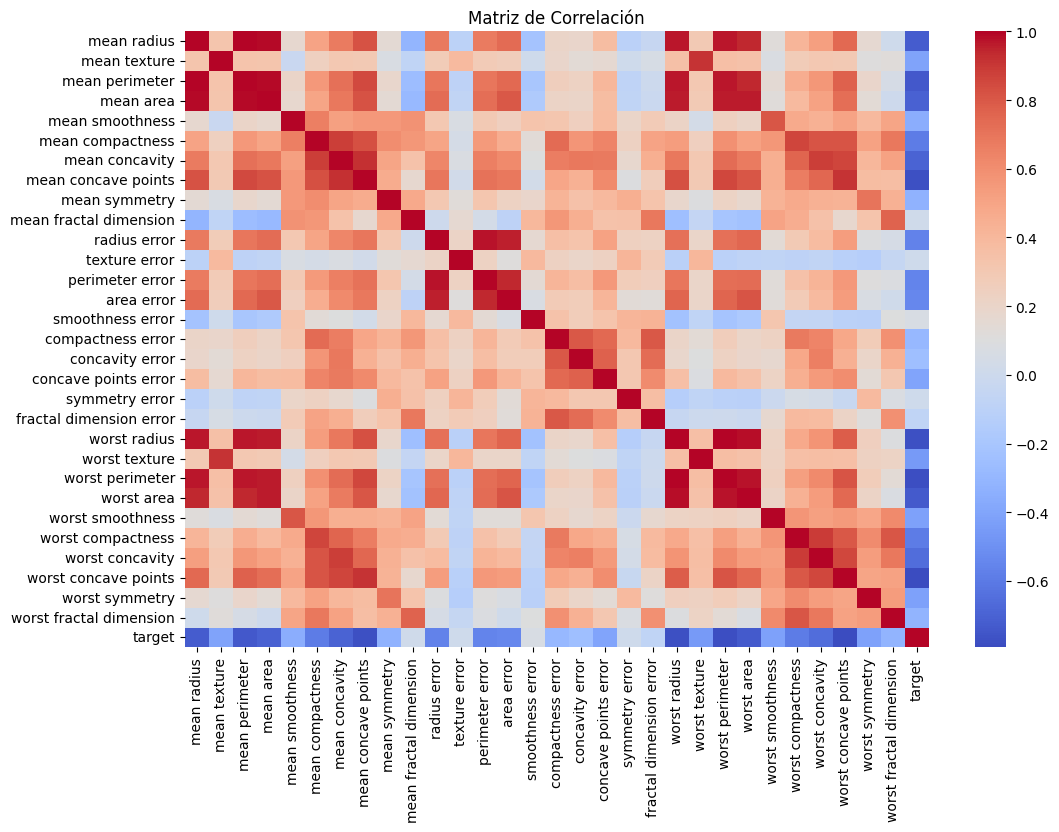

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()


La matriz de correlación muestra fuertes correlaciones
entre varias variables.

Esto indica redundancia en la información,
lo cual justifica el uso de PCA para reducir dimensionalidad
sin perder información relevante.


# 2. Procedimiento de Análisis de Componentes Principales (PCA)

## Estandarización de Datos

PCA se basa en la varianza. Si las variables están
en diferentes escalas, aquellas con mayor magnitud
dominarán el análisis.

Por ello, se estandarizan los datos para que cada
variable tenga media 0 y desviación estándar 1.


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]


array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

## Matriz de Covarianza

La matriz de covarianza mide cómo varían las variables
entre sí.

Valores altos positivos indican correlación directa,
valores negativos indican relación inversa.


In [16]:
cov_matrix = np.cov(X_scaled.T)
cov_matrix


array([[ 1.00176056e+00,  3.24351929e-01,  9.99612069e-01,
         9.89095475e-01,  1.70881506e-01,  5.07014640e-01,
         6.77955036e-01,  8.23976636e-01,  1.48001350e-01,
        -3.12179472e-01,  6.80285970e-01, -9.74887767e-02,
         6.75358538e-01,  7.37159198e-01, -2.22992026e-01,
         2.06362656e-01,  1.94545531e-01,  3.76831225e-01,
        -1.04504545e-01, -4.27163418e-02,  9.71245907e-01,
         2.97530545e-01,  9.66835698e-01,  9.42739295e-01,
         1.19826732e-01,  4.14190751e-01,  5.27839123e-01,
         7.45524434e-01,  1.64241985e-01,  7.07832563e-03],
       [ 3.24351929e-01,  1.00176056e+00,  3.30113223e-01,
         3.21650988e-01, -2.34296930e-02,  2.37118951e-01,
         3.02950254e-01,  2.93980713e-01,  7.15266864e-02,
        -7.65717560e-02,  2.76354360e-01,  3.87037830e-01,
         2.82169018e-01,  2.60302460e-01,  6.62542133e-03,
         1.92312595e-01,  1.43545353e-01,  1.64139495e-01,
         9.14323671e-03,  5.45533955e-02,  3.53193674e-

## Eigenvalores y Eigenvectores

Los eigenvalores representan la cantidad de varianza
explicada por cada componente principal.

Los eigenvectores representan las nuevas direcciones
sobre las cuales se proyectan los datos.


In [17]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

eigenvalues[:10]


array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888,  0.47745625,  0.41762878,  0.35131087])

El primer eigenvalor es considerablemente mayor que los demás,
lo que indica que el primer componente principal captura
la mayor dirección de varianza del espacio original.

Geométricamente, esto significa que los datos presentan
una dirección dominante de dispersión.

Esto confirma que existe redundancia en las variables originales,
lo que justifica la reducción de dimensionalidad.


## Ordenamiento de Componentes

Los componentes principales deben ordenarse
según los eigenvalores en orden descendente,
ya que los mayores representan mayor varianza explicada.


In [18]:
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

sorted_eigenvalues[:10]


array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888,  0.47745625,  0.41762878,  0.35131087])

## Matriz de Transformación

La matriz de transformación W está compuesta por los eigenvectores
ordenados de mayor a menor eigenvalor.

Matemáticamente, la transformación se expresa como:

Z = XW

donde:

- X representa los datos estandarizados
- W representa la matriz de transformación (eigenvectores ordenados)
- Z representa los nuevos componentes principales

Cada componente principal es una combinación lineal
de las variables originales proyectadas sobre las direcciones
de máxima varianza.


## Varianza Explicada

Se calcula el porcentaje de varianza explicada
por cada componente principal.


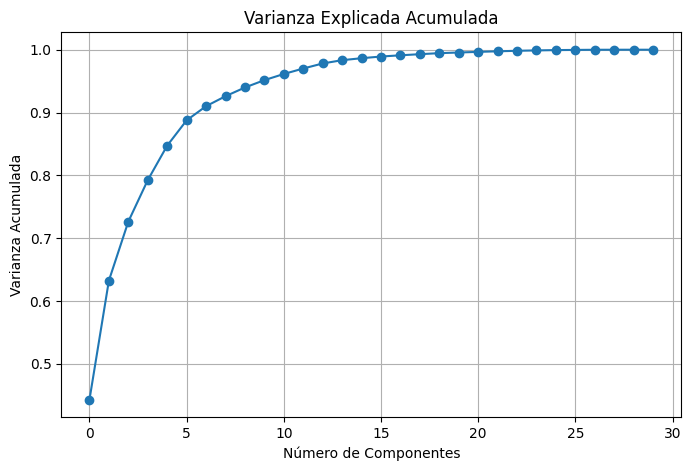

In [19]:
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o')
plt.title("Varianza Explicada Acumulada")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada")
plt.grid()
plt.show()


El gráfico de varianza acumulada muestra que los primeros
componentes principales capturan un alto porcentaje
de la varianza total del dataset.

Se observa que con pocos componentes se supera el 80% de varianza,
lo que indica que la dimensionalidad puede reducirse
sin pérdida significativa de información.


El gráfico permite observar cuántos componentes
capturan la mayor parte de la varianza total.

Generalmente, pocos componentes logran capturar
más del 80% de la varianza.


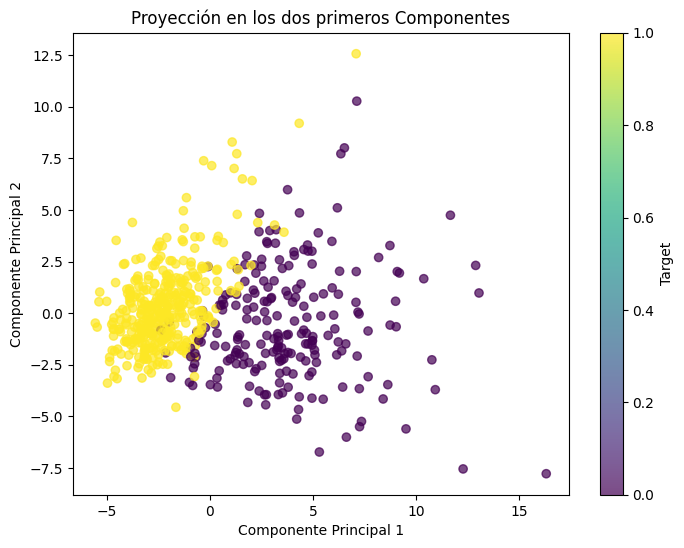

In [20]:
W2 = sorted_eigenvectors[:, :2]
X_pca_2 = np.dot(X_scaled, W2)

plt.figure(figsize=(8,6))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=y, cmap="viridis", alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Proyección en los dos primeros Componentes")
plt.colorbar(label="Target")
plt.show()


La proyección en 2 dimensiones muestra una clara separación
entre tumores benignos y malignos.

Esto indica que PCA preserva información relevante
para la clasificación.


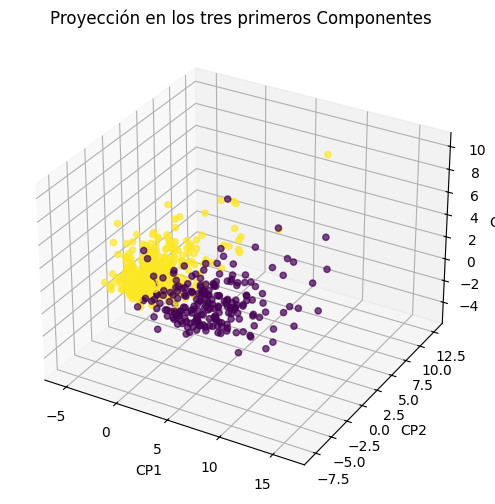

In [21]:
from mpl_toolkits.mplot3d import Axes3D

W3 = sorted_eigenvectors[:, :3]
X_pca_3 = np.dot(X_scaled, W3)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2], c=y, cmap="viridis", alpha=0.7)
ax.set_xlabel("CP1")
ax.set_ylabel("CP2")
ax.set_zlabel("CP3")
plt.title("Proyección en los tres primeros Componentes")
plt.show()


La visualización tridimensional refuerza la separación
entre clases, mostrando que la reducción de dimensionalidad
mantiene la estructura esencial del dataset.


# 3. Conclusiones

El Análisis de Componentes Principales permitió reducir
la dimensionalidad del dataset sin perder una proporción
significativa de la varianza total.

Los primeros componentes principales capturan
la mayor parte de la información relevante.

La proyección en 2D y 3D demuestra que el espacio reducido
mantiene una clara separación entre clases.

Por lo tanto, el dataset reducido es adecuado
para ser utilizado en arquitecturas neuronales
de clasificación.

Repositorio GitHub:
02-Principal-Component-Analysis
(Incluir aquí el enlace público)


# 4. Referencias

Breast Cancer Wisconsin Dataset:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

Jolliffe, I. T. (2002).
Principal Component Analysis (2nd ed.).
Springer.
